# Otimização de função alpine2

In [1]:
# Declarando Bibliotecas
import random
from itertools import combinations
import time
import matplotlib.pyplot as plt

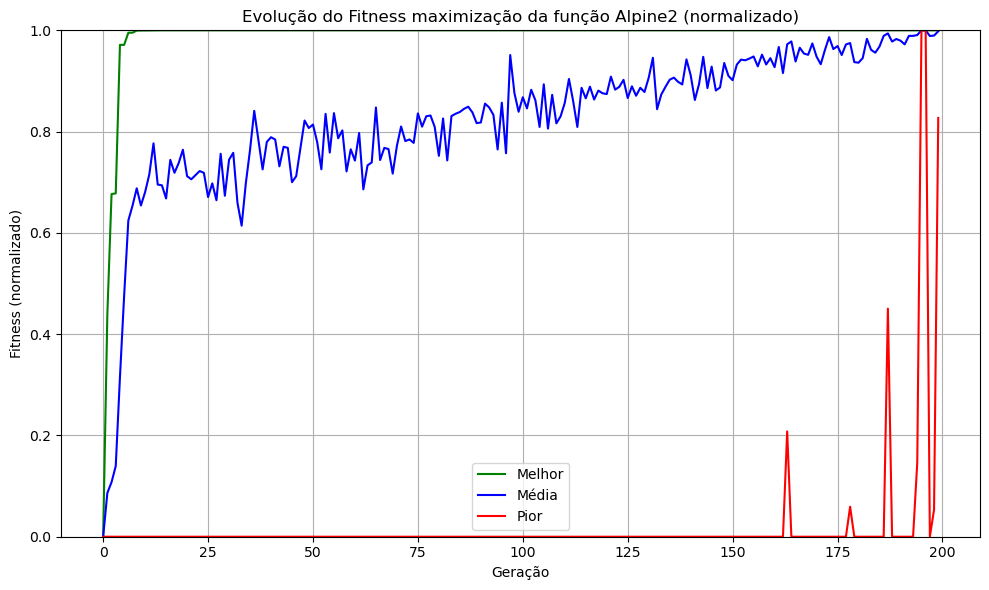

Finalizado: vídeo 'max_alpine2_evolution.mp4' e gráfico 'fitness_max_alpine2_normalizado.png' salvos.


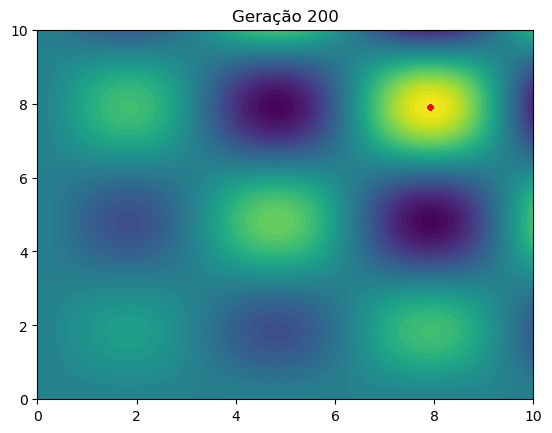

In [ ]:
# GA para a função Alpine2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter

# --- Função Alpine 2 ---
def alpine2(x):
    return np.prod(np.sqrt(x) * np.sin(x), axis=-1)

# Parâmetros do AG
POP_SIZE = 100
DIMENSIONS = 2
GENS = 200
X_BOUND = (0.0, 10.0)
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.2
np.random.seed(42)

# Inicializa a população
def initialize_population():
    return np.random.uniform(X_BOUND[0], X_BOUND[1], (POP_SIZE, DIMENSIONS))

# Avaliação de fitness diretamente (maximização)
def evaluate_population(pop):
    raw = alpine2(pop)
    return np.where(raw < 0, 0, raw)  # zera os negativos

# Seleção por torneio
def tournament_selection(pop, fitness, k=3):
    selected = np.random.choice(len(pop), k)
    best = selected[np.argmax(fitness[selected])]
    return pop[best]

# Crossover BLX-α
def crossover(p1, p2, alpha=0.5):
    if np.random.rand() < CROSSOVER_RATE:
        d = np.abs(p1 - p2)
        lower = np.minimum(p1, p2) - alpha * d
        upper = np.maximum(p1, p2) + alpha * d
        c1 = np.random.uniform(lower, upper)
        c2 = np.random.uniform(lower, upper)
        return c1, c2
    return p1.copy(), p2.copy()

# Mutação adaptativa
def mutate(ind, gen):
    dynamic_mutation_rate = MUTATION_RATE * (1 - gen / GENS)
    for i in range(DIMENSIONS):
        if np.random.rand() < dynamic_mutation_rate:
            ind[i] = np.random.uniform(X_BOUND[0], X_BOUND[1])
    return np.clip(ind, X_BOUND[0], X_BOUND[1])

# AG principal
def run_genetic_algorithm():
    pop = initialize_population()
    history = [pop.copy()]
    best_fitness = []
    avg_fitness = []
    worst_fitness = []

    for gen in range(GENS):
        fitness = evaluate_population(pop)

        best_fitness.append(np.max(fitness))
        avg_fitness.append(np.mean(fitness))
        worst_fitness.append(np.min(fitness))

        # Elitismo
        elite_idx = np.argmax(fitness)
        elite = pop[elite_idx].copy()

        new_pop = [elite]

        while len(new_pop) < POP_SIZE:
            p1 = tournament_selection(pop, fitness)
            p2 = tournament_selection(pop, fitness)
            c1, c2 = crossover(p1, p2)
            new_pop.append(mutate(c1, gen))
            if len(new_pop) < POP_SIZE:
                new_pop.append(mutate(c2, gen))

        pop = np.array(new_pop)
        history.append(pop.copy())

    return history, best_fitness, avg_fitness, worst_fitness

# --- Função de normalização ---
def normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    if max_val == min_val:
        return np.zeros_like(data)
    return (data - min_val) / (max_val - min_val)

# Executa o algoritmo
pop_history, best_fit, avg_fit, worst_fit = run_genetic_algorithm()

# Normaliza os valores de fitness para o gráfico
best_fit_norm = normalize(best_fit)
avg_fit_norm = normalize(avg_fit)
worst_fit_norm = normalize(worst_fit)

# --- Gráfico de fitness (normalizado entre 0 e 1) ---
plt.figure(figsize=(10, 6))
plt.plot(best_fit_norm, label="Melhor", color="green")
plt.plot(avg_fit_norm, label="Média", color="blue")
plt.plot(worst_fit_norm, label="Pior", color="red")
plt.xlabel("Geração")
plt.ylabel("Fitness (normalizado)")
plt.title("Evolução do Fitness maximização da função Alpine2 (normalizado)")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("fitness_max_alpine2_normalizado.png")
plt.show()

# --- Animação da população ---
x = np.linspace(X_BOUND[0], X_BOUND[1], 200)
y = np.linspace(X_BOUND[0], X_BOUND[1], 200)
X, Y = np.meshgrid(x, y)
Z = alpine2(np.stack([X, Y], axis=-1))

fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
sc = ax.scatter([], [], c='red', s=10)

def update(frame):
    sc.set_offsets(pop_history[frame])
    ax.set_title(f"Geração {frame}")
    return sc,

ani = animation.FuncAnimation(fig, update, frames=len(pop_history), blit=True)

# Salvar animação
writer = FFMpegWriter(fps=10, metadata=dict(artist='Genetic Algorithm'), bitrate=1800)
ani.save("max_alpine2_evolution.mp4", writer=writer)

print("Finalizado: vídeo 'max_alpine2_evolution.mp4' e gráfico 'fitness_max_alpine2_normalizado.png' salvos.")


